BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

기존방식과의 차이점
- 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
- BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식


In [2]:
from bs4 import BeautifulSoup as bs

In [11]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""
soup = bs(html_doc, 'html.parser')
print(soup.prettify())

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [12]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
soup = bs(html, 'html.parser')  # 파서 : 탐색기  (파싱 탐색)
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling  # 공백이 있어서 두번 들어감
print(h1.string)
print(p1.string)
print(p2.string)

스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


## find() : HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴


## find_all() : 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_로 클래스를 직접 사용 혹은 attrs에서 속성 = 값으로 필터링)


In [7]:
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = bs(html, 'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string)
print(body.string)

print(title.text)
print(body.text)
print(body.get_text())

스크레이핑이란?
웹 페이지를 분석하는 것
스크레이핑이란?
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [15]:
type(title.string)

bs4.element.NavigableString

In [16]:
type(title.text)

str

In [20]:
# texts = soup.findall('p')
texts = soup.find_all('p')
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [4]:
# urlopen()과 BeatifulSoup의 조합
from bs4 import BeautifulSoup as bs
import urllib.request as req

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"    #xml data
res = req.urlopen(url)
soup = bs(res, 'html.parser')
title = soup.find('title').string
wf = soup.find('wf').string  # 처음 것만 나옴 다 찾으려면 find_all

print(title, '\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [12]:
import requests
import re
# requests + 정규표현식 + bs
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp" 
data = requests.get(url).text
soup = bs(data, 'html.parser')
wf = soup.find('wf').string
wf = re.sub('[^0-9가-힣]+', " ", wf) # 숫자, 한글 아니면 공백
print(wf)

 강수 30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다 기온 이번 예보기간 아침 기온은 22 26도 낮 기온은 29 34도로 어제 24일 아침최저기온 22 24도 낮최고기온 25 32도 보다 높겠습니다 주말전망 30일 토 은 전라권에 소나기가 오는 곳이 있겠고 31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다 아침 기온은 23 25도 낮 기온은 31 34도가 되겠습니다 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며 앞으로 발표되는 기상정보를 참고하기 바랍니다 


####  0722_2
wf를 다시 정렬하여 불필요한 부분을 제거해서 아래와 같은 형식으로 출력하세요.(정규표현식 잘 써보셈)
```
'(강수) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다. 27일(수)은 수도권과 강원영서에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 22~26도로 어제(19일, 아침최저기온 20~24도)보다 조금 높겠고, 낮 기온은 28~34도로 어제(낮최고기온 27~34도)와 비슷하겠습니다.(주말전망) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다.
```

In [14]:
from bs4 import BeautifulSoup as bs
import urllib.request as req
import requests
import re
# requests + 정규표현식 + bs
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp" 
data = requests.get(url).text
soup = bs(data, 'html.parser')
wf = soup.find('wf').string
wf = re.sub(r'[^0-9가-힣()~,.]+[*/<br />○]+', " ", wf)
print(wf)
# [^0-9가-힣()~,.]

 (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다. (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. 아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다. 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [13]:
texts = soup.find_all('wf')
for t in texts:
    t = t.text
    t = re.sub(r"[^가-힣]+", " ", t)
    print(t, '\n')
    
    soup = bs(html, 'html.parser')
    result = soup.find_all('네이버')
    result

 강수 일 토 은 전라권에 소나기가 오는 곳이 있겠습니다 기온 이번 예보기간 아침 기온은 도 낮 기온은 도로 어제 일 아침최저기온 도 낮최고기온 도 보다 높겠습니다 주말전망 일 토 은 전라권에 소나기가 오는 곳이 있겠고 일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다 아침 기온은 도 낮 기온은 도가 되겠습니다 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며 앞으로 발표되는 기상정보를 참고하기 바랍니다  

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

흐림 

흐림 

흐림 

흐림 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

흐림 

흐림 

흐림 

흐림 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

맑음 

맑음 

흐림 

흐림 

흐림 

흐림 

흐림 

맑음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 


KeyboardInterrupt: 

In [10]:
req = requests.get('https://naver.com')
html = req.text
# print(html)

soup = bs(html, 'html.parser')
# result = soup.find_all('span', class_='blind')[0]
# result = soup.find_all('span', class_='fix')
result = soup.find_all('span', attrs={'class':'fix'})
# result = soup.find_all('span')
result

[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [36]:
import re

req = requests.get('https://naver.com')
soup = bs(html, "html.parser")
print(soup.find_all(string='네이버'))  # string = 에서 첫번째 네이버만 찾음
print(soup.find_all(string=re.compile('네이버')))  # 컴파일이 네이버 들어간 문장을 전부 찾음

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', "대한민국에서 가장 따뜻한 '북극성부동산재테크' 네이버 카페(북극성부동산재테크 (대한민국 No.1 부동산 커뮤니티) : 네이버 카페 (naver.com))에서 부동산 강의 멘토로 활동하고 있는, 상가 멘토 황금도끼 입니다.올 상반기 많은 일이 있었던 만큼 하반기에도 더 많은 일들이 있을 것 같습니다.공실도 감정가 2배 웃돈 주고 낙찰…엔데믹 호", '* 본 콘텐츠는 네이버카페 월급쟁이부자들 회원 벨지안가나슈님의 글을 재구성한 글입니다. \xa0 \xa02년 전에 비해 훌쩍 올라버린 전세금. 전세보증금을 현금으로 들고 집을 구하는 사람들은 많지 않습니다.\xa0대출을 받아 이 집에 살 수 있나? 대출이 얼마나 나오나? 어떤 대출을 받아야 유리한가? 전세금 마련에 꼭 필요한\xa0전세자금대출에 대해서 자세히 알아보겠습니다. &', '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


select_one(), select()        
 find , find_all 이랑 같음
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ., id는 #로 표시


In [1]:
from bs4 import BeautifulSoup as bs
import urllib.request as req

url = "https://finance.naver.com/marketindex/"

res = req.urlopen(url)
soup = bs(res, 'html.parser')
price = soup.select_one('div.head_info > span.value').string
print('usd/krw =', price)

usd/krw = 1,310.00


In [2]:
soup


<script language="javascript" src="/template/head_js.naver?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market"></script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20220719195125/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript"></script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20220719195125/js/jindo.1.5.3.element-text-patch.js" type="text/javascript"></script>
<div id="container" style="padding-bottom:0px;">
<div class="market_include">
<div class="market_data">
<div class="market1">
<div class="title">
<h2 class="h_market1"><span>ШЏРќ АэНУ ШЏРВ</span></h2>
</div>
<!-- data -->
<div class="data">
<ul class="data_lst" id="exchangeList">
<li class="on">
<a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
<h3 class="h_lst"><span class="blind">ЙЬБЙ USD</span></h3>
<div class="head_info point_dn">
<span class="value">1,310.00</span>
<span class=

In [2]:
# 카피 셀렉터 사이트에서 바로 가져와
from bs4 import BeautifulSoup as bs
import urllib.request as req

url = "https://finance.naver.com/marketindex/"

res = req.urlopen(url)
soup = bs(res, 'html.parser')
price = soup.select_one('#exchangeList > li.on > a.head.usd > div > span.value').string
print('usd/krw =', price)

usd/krw = 1,311.50


In [3]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""


In [18]:
!pip install lxml

In [4]:
from bs4 import BeautifulSoup as bs4

bs = bs4(html_doc, 'html.parser')  # lxml
print(bs.prettify())



<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [20]:
bs.title

<title>The Dormouse's story</title>

In [21]:
bs.title.name

'title'

In [22]:
bs.title.parent.name

'head'

In [23]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [24]:
bs.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [25]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [26]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [29]:
bs.a['class']

['sister']

In [30]:
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [31]:
bs.find_all()

[<html><head><title>The Dormouse's story</title></head>
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>,
 <head><title>The Dormouse's story</title></head>,
 <title>The Dormouse's story</title>,
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;

In [32]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

## string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


In [40]:
bs = bs4(html_doc, 'html.parser') 
print(bs)

<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>


In [35]:
print(bs.string)

None


In [37]:
# 문서의 모든  텍스트 출력
print(bs.get_text())

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [39]:
print(bs.find('div').string)

None


In [41]:
# 유니코드 형식까지 문자열로 변환해서 아무것도 출력 안함
print(bs.find('div').get_text())

In [42]:
print(bs.find('body').string)

None


In [44]:
bs.find('body').get_text() # 프린트 안하니까 개행까지 다나옴

"\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"

In [43]:
print(bs.find('body').get_text())



The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [45]:
# 스트링은 해당되는 것만 딱 지정해줘야 출력
bs.a.string

'Elsie'

In [49]:
li = bs.find_all('p')
li

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [48]:
# 두번째 줄부터 여러태그에 (중복)걸쳐서 나와서 None으로 출력됨
li = bs.find_all('p')
for i in li:
    print(i.string) 

The Dormouse's story
None
...


In [50]:
for i in li:
    print(i.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


urllib + bs

In [5]:
import urllib.request as rq
from bs4 import BeautifulSoup as bs4
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = bs4(html, 'lxml')
text = bs.find('p')
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

In [54]:
bs.find('div').find('a').string

'메인 메뉴로 바로가기'

In [26]:
items = bs.find('div').find_all('a')
for item in items:
    print(item.get_text(), end=' ')

메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별  정치 선택됨 경제  사회  생활/문화  IT/과학  세계  랭킹  신문보기  오피니언  TV  팩트체크  전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실  국회/정당  북한  행정  국방/외교  정치일반    안내헤드라인 뉴스 

 '사법리스크'에 '셀프 공천' 논란까지, 악재 겹친 이재명 이재명 셀프 공천 논란에…野 당권주자들 “해명하라” ‘97세대’ 당권후보들 “공천 학살 막겠다”… 이재명에 견제구 ‘민생 메시지’ 올인하는 이재명…‘이재명 때리기’ 올인하는 비명계 18개의 관련뉴스 더보기 

동영상기사
 尹 "여가부 폐지 로드맵 필요"...성범죄 피해 男 보호시설 설치 식물부처 전락 여가부…윤 정부 여성공약은 타부처가 ‘폐지’ 빠진 여가부 업무보고…尹대통령 “폐지 로드맵 조속 마련하라” 윤석열 대통령 "여가부 폐지 로드맵 빨리 마련하라" 93개의 관련뉴스 더보기 

 대통령실 “탈북어민 북송사건 인수·인계 받은 내용 놀라울 정도로 없어” 대통령실 “북송 관련 인수인계 없어…놀라울 정도로 자료 없다” 대통령실 “북송어민 인수인계 無…놀라울 정도로 자료 없어” 안보실 “북송 인수인계 없었다…놀라울 정도로 자료 없어” 28개의 관련뉴스 더보기 

 이재명 "尹 경제·민생대책 되레 양극화 심화" 이재명 "경제·민생 대책 거꾸로…한시적 공매도 금지해야" 이재명 "尹정부 경제·민생대책 거꾸로…공매도 한시 금지해야" 거래소 찾은 이재명 "윤석열 정부, 민생대책 거꾸로…공매도 한시 금지해야" 44개의 관련뉴스 더보기 

 與 “운동권 신분 세습법” vs 野 “사실 왜곡” 

 이한열·전태일·박종철도 못받은 유공자 대우···‘운동권 셀프보상’ ‘신분세습법’ 비판은 타당한가[팩트체크] 24개의 관련뉴스 더보기 

 국방장관 "유엔사, 탈북민 판문점 북송 승인"…與 주장과 달랐다 

 "유엔사가 北어민 판문점통과 승인"…'유엔사 패싱' 주장과

####  0725_1
상기 출력물을 불필요한 공백없이 정렬하여 출력하세요

In [6]:
items = bs.find('div').find_all('a')
for item in items:
#     item = re.sub('\s{2:}',' ', item)
    print(item.get_text(), end=' ')
 


메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별  정치 선택됨 경제  사회  생활/문화  IT/과학  세계  랭킹  신문보기  오피니언  TV  팩트체크  전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실  국회/정당  북한  행정  국방/외교  정치일반    안내헤드라인 뉴스 

 '사법리스크'에 '셀프 공천' 논란까지, 악재 겹친 이재명 이재명 셀프 공천 논란에…野 당권주자들 “해명하라” ‘97세대’ 당권후보들 “공천 학살 막겠다”… 이재명에 견제구 ‘민생 메시지’ 올인하는 이재명…‘이재명 때리기’ 올인하는 비명계 18개의 관련뉴스 더보기 

동영상기사
 尹 "여가부 폐지 로드맵 필요"...성범죄 피해 男 보호시설 설치 식물부처 전락 여가부…윤 정부 여성공약은 타부처가 ‘폐지’ 빠진 여가부 업무보고…尹대통령 “폐지 로드맵 조속 마련하라” 윤석열 대통령 "여가부 폐지 로드맵 빨리 마련하라" 93개의 관련뉴스 더보기 

 대통령실 “탈북어민 북송사건 인수·인계 받은 내용 놀라울 정도로 없어” 대통령실 “북송 관련 인수인계 없어…놀라울 정도로 자료 없다” 대통령실 “북송어민 인수인계 無…놀라울 정도로 자료 없어” 안보실 “북송 인수인계 없었다…놀라울 정도로 자료 없어” 28개의 관련뉴스 더보기 

 이재명 "尹 경제·민생대책 되레 양극화 심화" 이재명 "경제·민생 대책 거꾸로…한시적 공매도 금지해야" 이재명 "尹정부 경제·민생대책 거꾸로…공매도 한시 금지해야" 거래소 찾은 이재명 "윤석열 정부, 민생대책 거꾸로…공매도 한시 금지해야" 44개의 관련뉴스 더보기 

 與 “운동권 신분 세습법” vs 野 “사실 왜곡” 

 이한열·전태일·박종철도 못받은 유공자 대우···‘운동권 셀프보상’ ‘신분세습법’ 비판은 타당한가[팩트체크] 24개의 관련뉴스 더보기 

 국방장관 "유엔사, 탈북민 판문점 북송 승인"…與 주장과 달랐다 

 "유엔사가 北어민 판문점통과 승인"…'유엔사 패싱' 주장과

In [69]:
import re
items = bs.find('div').find_all('a')
li=[]
for item in items:
    li.append(item.get_text())
li = ' '.join(li)
li = re.sub('[\'\n]+','', li)


li




'메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별  정치 선택됨 경제  사회  생활/문화  IT/과학  세계  랭킹  신문보기  오피니언  TV  팩트체크  전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실  국회/정당  북한  행정  국방/외교  정치일반    안내헤드라인 뉴스  사법리스크에 셀프 공천 논란까지, 악재 겹친 이재명 이재명 셀프 공천 논란에…野 당권주자들 “해명하라” ‘97세대’ 당권후보들 “공천 학살 막겠다”… 이재명에 견제구 ‘민생 메시지’ 올인하는 이재명…‘이재명 때리기’ 올인하는 비명계 18개의 관련뉴스 더보기 동영상기사 尹 "여가부 폐지 로드맵 필요"...성범죄 피해 男 보호시설 설치 식물부처 전락 여가부…윤 정부 여성공약은 타부처가 ‘폐지’ 빠진 여가부 업무보고…尹대통령 “폐지 로드맵 조속 마련하라” 윤석열 대통령 "여가부 폐지 로드맵 빨리 마련하라" 93개의 관련뉴스 더보기  대통령실 “탈북어민 북송사건 인수·인계 받은 내용 놀라울 정도로 없어” 대통령실 “북송 관련 인수인계 없어…놀라울 정도로 자료 없다” 대통령실 “북송어민 인수인계 無…놀라울 정도로 자료 없어” 안보실 “북송 인수인계 없었다…놀라울 정도로 자료 없어” 28개의 관련뉴스 더보기  이재명 "尹 경제·민생대책 되레 양극화 심화" 이재명 "경제·민생 대책 거꾸로…한시적 공매도 금지해야" 이재명 "尹정부 경제·민생대책 거꾸로…공매도 한시 금지해야" 거래소 찾은 이재명 "윤석열 정부, 민생대책 거꾸로…공매도 한시 금지해야" 44개의 관련뉴스 더보기  與 “운동권 신분 세습법” vs 野 “사실 왜곡”  이한열·전태일·박종철도 못받은 유공자 대우···‘운동권 셀프보상’ ‘신분세습법’ 비판은 타당한가[팩트체크] 24개의 관련뉴스 더보기  국방장관 "유엔사, 탈북민 판문점 북송 승인"…與 주장과 달랐다  "유엔사가 北어민 판문점통과 승인"…유엔사 패싱 주장과 배치 20개의 관련뉴스 더보기  주가조

In [65]:
items = bs.find('div', id='header').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리


In [69]:
texts = bs.find_all('p')
for t in texts:
#     print(t.string)
    print(t.get_text())

AiRS추천으로 구성된 뉴스를 제공합니다.
오전 11시~오후 12시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [88]:
import urllib.request as rq
import re

url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = bs4(html,'lxml')

text = bs.text   # 그냥 text네  get_text는 원하는 부분만 뽑을 수 있고  text는 다 뽑아냄 
text = re.sub('[^가-힣]+',' ', text)
text = re.sub('\s{2:}',' ', text)

print(text)

 네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 오마이뉴스 월 일 구독 인하대 성폭력사망에 성범죄 피해 가 남성 여가부 장관 학생 안전의 문제 라고 지적하면서도 취지 벗어난 발언으로 논란 남성 가해자 여성 피해자 문제 아닌 학생 안전의 문제 인하대 성폭력 사건의 김현숙 여가부 장관 발언 논란 김혜리 김현숙 여성가족부 장관 강원도민일보 월 일 구독 속보 류삼영 경찰서장 모임 해산명령은 직권남용 행안부장관 윗선 압력 전국 경찰서장 회의에 참석했다가 대기발령 조치를 당한 울산중부경찰서장 류삼영 총경이 휴일에 정당한 절차를 거쳐 세미나 형식을 회의를 한 것에 대한 징계는 부당하고 해당 모임에 대해 강제해산 명령은 오히려 직권 남용 경향신문 월 일 구독 피겨퀸 김연아 성악가 고우림과 월 전격 결혼 피겨퀸 김연아 가 오는 월 결혼한다 김연아의 매니지먼트사인 올댓스포츠는 일 김연아가 월 하순 서울 모처에서 성악가 고우림 과 화촉을 밝힌다 고 밝혔다 고우림의 소속사도 김연아와 년 열 월 일 구독 동영상 재생시간 피겨퀸 김연아 월 결혼 성악가 고우림과 년 교제 끝에 웨딩마치 피겨퀸 김연아 가 오는 월 결혼합니다 김연아의 매니지먼트사인 올댓스포츠는 오늘 일 김연아가 월 하순 서울 모처에서 성악가 고우림 과 화촉을 밝힌다 고 밝혔습니다 올댓스포츠는 김연아와 채널 월 일 구독 박범계 한동훈에 법치농단 따져 묻겠다 윤석열 정부의 첫 대정부질문 질의자로 나서는 박범계 더불어민주당 의원이 한동훈 법무부장관에게 법치농단 하는 이유를 따져 묻겠다고 밝혔습니다 박 의원은 오늘 일 라디오 김현정의 뉴스쇼 에서 현재 법 새로보기 한국경제 월 일 구독 만원 넘게 줬는데 부모님 집 에어컨 설치 논란 에어컨 스탠드 벽걸이 이 설치된 사진 한 장이 온라인을 달구고 있다 작성자 씨는 최근 커뮤니티에 부

In [92]:
import urllib.request as rq
import re

url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = bs4(html,'lxml')
bs = bs.get_text()    # 태그 사이의 문자만 뽑아줌
# bs = str(bs)          # 다 스트링으로 바꿔줌

# text = bs.text   
result = re.findall('[가-힣]+',bs)
result = ' '.join(result)
result


'네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 미디어오늘 월 일 구독 국민의힘 수신료 폐지주장에 비전문가적 주장 비판한 노조 프랑스가 수신료 폐지를 결정하면서 국민의힘과 조선일보가 논평과 기사로 공영방송 수신료 폐지를 다시 꺼내들며 를 압박했다 그러자 보수성향의 노동조합이 언론노조 세력만 키워주는 오판 이라며 국민의힘의 월 일 구독 오늘부터 해외에서 입국 시 일 이내 검사해야 국내 코로나 확산세가 거세지고 있는 가운데 오늘 일 부터 해외에서 입국하는 사람은 일 이내로 유전자증폭 검사를 받아야 합니다 정부는 지난 월 입국 일 이내 로 완화했던 검사를 오늘 뉴스 월 일 구독 김연아 팬텀싱어 세 연하 서울대 출신 고우림과 월 결혼 축하 물결 종합 포레스텔라 고우림 왼쪽 김연아 뉴스 뉴스 서울 뉴스 고승아 기자 전 피겨스케이팅 국가대표 선수 김연아 와 그룹 포레스텔라 멤버 팝페라 가수 고우림 이 깜짝 결혼 소식을 알렸다 고우림 소속사 비트인터렉티브는 일 공식입장을 내고 고우림은 오는 월 김연아와 결혼식을 지디넷코리아 월 일 구독 일론 머스크 구글 창업자 세르게이 브린 아내와 불륜 일론 머스크 테슬라 최고경영자 가 친한 친구이던 세르게이 브린 구글 공동창업자의 아내와 불륜을 저질렀다고 월스트리트저널 이 일 현지시간 보도했다 보도에 따르면 세르게이 브린은 지난 월 아내 니 아이뉴스 월 일 구독 김연아 고우림 월 결혼 년 열애 피겨여왕 김연아와 가수 고우림이 부부의 연을 맺는다 크로스오버 그룹 포레스텔라 멤버 고우림 소속사 비트인터렉티브 측은 일 고우림은 오는 월 피겨여왕 김연아와 결혼식을 올린다 며 공식 입장을 밝혔다 소 새로보기 월 일 구독 동영상 재생시간 이상한 변호사 우영우 팽나무 천연기념물 지정 조사 문화재청은 인기리에 방송 중인 이상한 변호사 우영우 에 등장

In [99]:
import urllib.request as rq
import re

url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = bs4(html,'lxml')
texts = bs.find_all('p')
for t in texts:
#     print(t.string, '\n')
    print(t.get_text(), '\n')

“에너지 문제는 복잡하지만 더 지속 가능한 길이 있을 겁니다. 단기적으론 석탄이 경제적이어도 장기적으로 사회가 감당 가능하고 적절한 에너지 생산 방법이 있습니다. 사회에 더 이익이 가는 방향으로 가야 합니다.” 20 

'피겨 여왕' 김연아(32)와 팝페라 가수 고우림(27)이 결혼한다. 25일 두 사람의 열애 소식과 함께 고우림 소속사 비트인터렉티브는 이날 공식입장을 내고 "고우림은 오는 10월 '피겨여왕' 김연아와 결혼식을 올린 

■'노르트스트림1' 운영은 재개됐지만, 공급량은 반쪽에 불과? 당초 우려에도 불구하고 중단되었던 러시아-유럽 가스관 노르트스트림1을 통한 가스공급이 지난 21일 재개되었습니다. 정기점검을 위해 노르트스트림1이 7월  

윤석열 대통령의 국정수행 지지율(긍정 평가)이 3주째 30%대에서 답보하고 있다. 이런 가운데, 윤 대통령에 대한 20대의 긍정 평가는 20%대까지 하락한 것으로 나타났다. 리얼미터가 지난 18∼22일 성인 2527 

#. 지난 4월 철거공사를 끝낸 서울 용산의 한 다세대주택(빌라). 건물 4개를 허문 자리에 각종 폐기물이 방치된 채로 공사장 인부들은 물론 포클레인 등 공사 장비가 3개월째 자취를 감춰버렸다. 건축비 상승으로 공사 

문화재청은 인기리에 방송 중인 '이상한 변호사 우영우'에 등장한 팽나무의 문화재적 가치를 판단하기 위해 천연기념물 지정 조사를 하기로 했습니다. 이 드라마 8회에 나온 팽나무는 경남 창원시 북부리 마을 산정에 우뚝  

‘피겨퀸’ 김연아(32)가 오는 10월 5세 연하 성악가이자 '포레스텔라' 멤버 고우림과 결혼한다. 김연아의 매니지먼트사인 올댓스포츠는 25일 “김연아가 오는 10월 하순 서울 모처에서 성악가 고우림(27)과 화촉을 

썰물의 시간이 지나고 밀물의 시간이 돌아왔다. 3월 중순 하루 62만명으로 정점을 찍은 뒤 줄어들던 신규 확진자가 15주 만에 상승세를 나타냈다. 기울기는 제법 가파르다. 7월 첫째 주 주간 일평균 확진자 수는 약  

‘피겨여왕’ 김연아(32)가 

requests + bs

In [103]:
import requests as rq
from bs4 import BeautifulSoup as bs4

url = 'https://news.naver.com'
r = rq.get(url)
html = r.text
bs = bs4(html, 'lxml')   # html.parser 가능
text = bs.find('p').get_text()
text

"올 초 전 국민을 충격에 빠뜨렸던 '계곡 살인 사건'이 일어난 경기도 가평 용소계곡에 관광객들의 발길이 북새통을 이루고 있다. 이곳에서는 지난해 7월에도 30대 남성이 숨지는 등 매년 익사 사고가 발생하고 있으나 이"

####  0725_2
기상청 육상 정보에서 강원도의 지역번호는 105이다. 강원도의 날씨 예보를 출력하세요. (불필요한 공백 제거)

In [114]:

from bs4 import BeautifulSoup as bs
import urllib.request as req
import re

url = "https://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=105"    #xml data
res = req.urlopen(url)
soup = bs(res, 'html.parser')
title = soup.find('title').string
wf = soup.find('wf').string  # 처음 것만 나옴 다 찾으려면 find_all

wf = re.sub('[^0-9가-힣()m.~]+', ' ', wf)
print(title, '\n')
print(wf)

기상청 육상 중기예보 

 (하늘상태) 31일(일)까지 가끔 구름많겠으나 8월 1일(월)부터 대체로 흐리겠습니다. (기온) 이번 예보기간 아침 기온은 17~26도 낮 기온은 26~33도로 어제(24일 아침최저기온 18~23도 낮최고기온 26~31도)와 비슷하거나 조금 높겠습니다. (해상) 동해중부해상의 물결은 30일(토)까지 0.5~1.0m로 일다가 31일(일)부터 1.0~2.0m로 일겠습니다. (주말전망) 30일(토)은 가끔 구름많겠으나 31일(일)은 대체로 맑겠습니다. 아침 기온은 19~25도 낮 기온은 27~33도가 되겠습니다. 이번 예보기간 동안 우리나라 주변 기압계에 따라 대기 불안정으로 소나기가 내릴 가능성이 있겠으니 앞으로 발표되는 기상정보를 참고하기 바랍니다.


####  0725_3 Q. "http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.


In [71]:
from bs4 import BeautifulSoup as bs4
import requests as rq
import re
import lxml
url = 'https://www.naver.com'
res = rq.get(url)
res = res.text
soup = bs4(res, 'lxml')
span = soup.find_all('span')

for i in span:
    a = i.get_text()
    a = re.sub('[^가-힣]+',' ', a)
#     print(re.sub('[^가-힣]+',' ', a))
    print(re.sub('\s+', ' ', a), end=' ')

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요  매일 쓰는 브라우저 보안이 걱정된다면  다운로드 쥬니어네이버 해피빈 검색  한글 입력기  자동완성 레이어        삭제  설정이 초기화 된다면 도움말을 확인해주세요  설정이 초기화 된다면 도움말을 확인해주세요   도움말  도움말  자동저장 끄기   자동저장 끄기    회차 당첨번호  추첨 지급기한 년  추첨  지급기한 년                원   원                      바로가기  바로가기     추가      추가        추가    자세히보기    도움말 신고  도움말 신고  자동완성 끄기   자동완성 끄기  쇼핑 쇼핑      이태원동 이태원동     리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음                         닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음  개의 글 이전 다음   네이버  네이버              빅마우스  빅마우스   재생 재생시간  재생시간  시간 전  동상이몽 너는 내 운명  동상이몽 너는 내 운명   재생 재생시간  재생시간  분 전  네이버 웹툰  네이버 웹툰   재생 재생시간  재생시간  분 전  홀인러브  홀인러브    재생 재생시간  재생시간  분 전  홀인러브  홀인러브    재생 재생시간  재생시간  분 전  홀인러브  홀인러브    재생 재생시간  재생시간  시간 전  미남당  미남당   재생 재생시간  재생시간  시간 전  톡파원 시  톡파원 시   재생 재생시간  재생시간  분 전  네이버 웹툰  네이버 웹툰   재생 재생시간  재생시간  시간 전  링크  링크 오전 시 업데이트 위 상승   있지    재생 가사 위 상승   초봄 에이핑크 초봄    재생 가사 위 상승      재생 가사 위 하락   스테이씨  

In [60]:
url = 'https://www.naver.com'
res = rq.get(url)
res = res.text
soup = bs4(res, 'lxml')
span = soup.find_all('span')
a = ""
for i in span:
    a += i.get_text()
a = re.sub('[^가-힣]+',' ', a)
a


# for i in span:
#     print(i.get_text(), end=' ')
    
    

'뉴스스탠드 바로가기주제별캐스트 바로가기타임스퀘어 바로가기쇼핑캐스트 바로가기로그인 바로가기매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드쥬니어네이버해피빈검색한글 입력기자동완성 레이어 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 바로가기 바로가기 추가 추가 추가 자세히보기 도움말 신고 도움말신고 자동완성 끄기 자동완성 끄기 쇼핑쇼핑 이태원동이태원동리스트형썸네일형설정이전다음닫기닫기이전다음닫기닫기이전다음다음닫기닫기이전다음닫기닫기주제별로 분류된 다양한 글 모음 개의 글이전다음재생 재생시간 재생시간 비엔나소시지 간단요리 비엔나소시지 간단요리재생 재생시간 재생시간 보양식 중복요리 보양식 중복요리 일 전 엘르 코리아 엘르 코리아 주일 전 채영테이블 채영테이블 주일 전 끝도없는 인기 끝도없는 인기 일 전 우먼센스 우먼센스 재생재생시간 재생시간 주일 전 그루밍식당 그루밍식당 재생재생시간 재생시간 주일 전 그루밍식당 그루밍식당 재생재생시간 재생시간 개월 전 백년밥상 백년밥상 개월 전 미세스브라운 미세스브라운 주일 전 웅이맘 웅이맘 주일 전 반 짝 거 리 면 돼지 반 짝 거 리 면 돼지 개월 전 세라 세라이전다음펀딩 달성다온농원다온농원펀딩 달성새뜸새뜸펀딩 달성데일리스티치협동조합데일리스티치협동조합펀딩 달성그린황칠그린황칠기부 원 기부열매나눔재단열매나눔재단기부 원 기부굿하트 금천재가노인지원센터굿하트 금천재가노인지원센터 주일 전 아무튼 봄 아무튼 봄 주일 전 봉자바리 봉자바리 주일 전 데일리 데일리 주일 전 요니 요니 주일 전 리빙 레시피 리빙 레시피 주일 전 하누리홈쿡 하누리홈쿡 주일 전 주말유정 주말유정 개월 전 다니 다니 개월 전 마녀욜리 마녀욜리 개월 전 에이치라떼 에이치라떼 개월 전 오포댁 오포댁 개월 전 달꿈 달꿈 주일 전 콩쥬언니 콩쥬언니 개월

In [61]:
url = 'https://www.naver.com'
res = rq.get(url)
res = res.text
soup = bs4(res, 'lxml')
span = soup.find_all('span')
li=[]
for i in span:
    li.append(i.get_text())
li = ' '.join(li)
li = re.sub('[^가-힣]+',' ', li)
li

'뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 바로가기 바로가기 추가 추가 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 개의 글 이전 다음 네이버 네이버 빅마우스 빅마우스 재생 재생시간 재생시간 분 전 홀인러브 홀인러브 재생 재생시간 재생시간 분 전 홀인러브 홀인러브 재생 재생시간 재생시간 시간 전 링크 링크 재생 재생시간 재생시간 분 전 홀인러브 홀인러브 재생 재생시간 재생시간 시간 전 미남당 미남당 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 재생 재생시간 재생시간 일 전 이상한 변호사 우영우 이상한 변호사 우영우 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 재생 재생시간 재생시간 시간 전 톡파원 시 톡파원 시 오전 시 업데이트 위 상승 있지 재생 가사 위 상승 초봄 에이핑크 초봄 재생 가사 위 상승 재생 가사 위 하락 스테이씨 재생 가사 위 상승 워너비 오아시소 워너비 집 재생 가사 위 상승 지코 재생 가사 위 상승 하은 포맨 입술 끝에 두고 온 말 재생 가사 위 상승 재생 가사 위 상승 현아 나빌레라 재생 가사 위 하락 프로미스나인 재생 가사 재생 재생시간 재생시간 시간 전 동상이몽 너는 내 운명 동상이몽 너는 내 운명 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 재생 재생시간 재생시간 시간 전 동상

#### 0725_4  Q. "http://www.naver.com" 사이트에서 span 태그에 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 출력하세요.


In [72]:
url = 'https://www.naver.com'
res = rq.get(url)
res = res.text
soup = bs4(res, 'lxml')
span = soup.find_all('span')
li=[]
for i in span:
    li.append(i.get_text())
li = ' '.join(li)
li = re.sub('[^\w\d]+',' ', li)
li

'뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 txt txt date 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 추첨 13 지급기한 1년 6 7 8 9 10 11 12 6 7 8 9 10 11 12 14 txt currency currency 8 9 8 9 6 원 6 원 txt 7 message 7 message 7 8 7 8 7 txt 5 5 바로가기 바로가기 txt 추가 txt date 추가 query intend intend 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑LIVE 24 0 33 0 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 676 개의 글 이전 다음 재생 재생시간 1 53 재생시간 비엔나소시지 간단요리 비엔나소시지 간단요리 재생 재생시간 4 06 재생시간 보양식 중복요리 보양식 중복요리 5일 전 엘르 코리아 엘르 코리아 2주일 전 채영테이블 채영테이블 3주일 전 끝도없는 인기 끝도없는 인기 4일 전 우먼센스 womansense 우먼센스 womansense 재생 재생시간05 40 재생시간 2주일 전 그루밍식당 Grooming Kitchen 그루밍식당 Grooming Kitchen 재생 재생시간04 34 재생시간 2주일 전 그루밍식당 Grooming Kitchen 그루밍식당 Grooming Kitchen 재생 재생시간10 13 재생시간 6개월 전 백년밥상TV 백년밥상TV 1개월 전 미세스브라운 미세스브라운 2주일 전 웅이맘

#### 0725_5 Q. "http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.


In [78]:
url = 'https://www.naver.com'
res = rq.get(url)
res = res.text
soup = bs4(res, 'lxml')
soup.find_all('a', id=True)    # id = True

[<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1b" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="btn_keyboard" href="#" id="ke_kbd_btn" onclick="return false;" role="button"><span class="blind">한글 입력기</span><span class="ico_keyboard"></span></a>,
 <a aria-pressed="false" class="btn_arw _btn_arw fold" data-atcmp-element="" href="#" id="nautocomplete" role="button" tabindex="2"><span class="blind">자동완성 레이어</span><span class="ico_arr"></span></a>,
 <a class="btn_set" data-clk="tca.like" href="#" id="NM_THEME_EDIT_SET" role="button">관심주제 설정</a>,
 <a class="content_top" href="#wrap" id="NM_scroll_top_btn"><span class="blind">TOP</span></a>]

In [77]:
url = 'https://www.naver.com'
res = rq.get(url)
res = res.text
soup = bs4(res, 'lxml')
span = soup.find_all('a', id=True)
for i in span:
    a = i.get_text()
    a =re.sub('[\W]+', ' ', a)
    print(a, end=" ")

다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP 

#### 0725_6 url = 'https://news.naver.com/' 사이트 p태그에서 class가 cjs_ht인 데이터를 한글만 출력하세요. 불필요한 공백 제거


In [191]:
soup.find_all('p', {'class':'cjs_ht'})

[<p class="cjs_ht">
                         
                             
                                 오늘 언론사가 발행한<br/>종이신문에 실린 뉴스 1면<br/>기사가 제공됩니다.
                             
                             
                         
                     </p>]

In [87]:
url = 'https://news.naver.com/'
res = rq.get(url)
res = res.text
soup = bs4(res, 'lxml')
p = soup.find('p',attrs={'class':'cjs_ht'})

p = re.sub('[^가-힣]+',' ', str(p))
print(p)

 오늘 언론사가 발행한 종이신문에 실린 뉴스 면 기사가 제공됩니다 


In [93]:
from bs4 import BeautifulSoup as bsp
import urllib.request as rq


url = 'https://naver.com/'
html = rq.urlopen(url)
bs = bsp(html, 'lxml')

# print(bs.find('p'))
print(bs.find_all('p', limit=1), '\n')   # find_all 안에서 제한 옵션 가능
print(bs.find_all('p', limit=2), '\n')
print(bs.find_all('p', limit=3))

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>, <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>]


In [103]:
from bs4 import BeautifulSoup as bsp
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)
html = html.text
bs = bsp(html, 'lxml')
title = bs.find('h2', id="mainContent").text

title

'정치'

In [100]:
from bs4 import BeautifulSoup as bsp
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)
html = html.text
bs = bsp(html, 'lxml')
# title = bs.find('span', attr={'class':'txt_gnb'})
# title = bs.find('span', class_='xt_gnb').text
title = bs.select_one('#gnbContent > div > ul > li.on > a > span').text
title

'정치'

In [116]:
# Q. 네이버 영화 랭킹 가져와서 첫번째 영화제목을 출력하세요.
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
soup = bsp(html, 'lxml')
div = soup.find_all('div', class_='tit3')
for i in div:
    i.get_text()
print(div[0].text)


외계+인 1부



#### 0726_1
네이버 영화 랭킹 가져와서 조회순 전체 영화제목을 출력하세요 ( 출력방식 1위: 외계+인 1부)

In [1]:
# Q. 네이버 영화 랭킹 가져와서 첫번째 영화제목을 출력하세요.
from bs4 import BeautifulSoup as bsp
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
soup = bsp(html, 'lxml')
div = soup.find_all('div', class_='tit3')
div
# for i in div:
#     i.get_text()
for i in range(0,50):
    print(f'{i+1}위 : {div[i].get_text().strip()}')

1위 : 외계+인 1부
2위 : 탑건: 매버릭
3위 : 한산: 용의 출현
4위 : 헤어질 결심
5위 : 범죄도시2
6위 : 그레이 맨
7위 : 토르: 러브 앤 썬더
8위 : 미니언즈2
9위 : 마녀(魔女) Part2. The Other One
10위 : 비상선언
11위 : 더 킬러: 죽어도 되는 아이
12위 : 명탐정 코난: 할로윈의 신부
13위 : 엘비스
14위 : 뒤틀린 집
15위 : 헌트
16위 : 썸머 필름을 타고!
17위 : 아이를 위한 아이
18위 : 멘
19위 : 브로커
20위 : 놉
21위 : 쥬라기 월드: 도미니언
22위 : 뽀로로 극장판 드래곤캐슬 대모험
23위 : 메모리
24위 : 닥터 스트레인지: 대혼돈의 멀티버스
25위 : 임파서블 러브
26위 : 범죄도시
27위 : 핸썸
28위 : 오싹한 동거
29위 : 스파이형 모델
30위 : 굿 럭 투 유, 리오 그랜드
31위 : 극장판 주술회전 0
32위 : 로스트 도터
33위 : 섹스 앤 퓨리
34위 : 탑건
35위 : 군다
36위 : 명량
37위 : 버즈 라이트이어
38위 : 큐어
39위 : 니얼굴
40위 : VR 파이터
41위 : 리미트
42위 : 특송
43위 : 불릿 트레인
44위 : 마녀
45위 : 귀멸의 칼날: 아사쿠사 편
46위 : 보스 베이비 2
47위 : 감동주의보
48위 : DC 리그 오브 슈퍼-펫
49위 : 클라우스
50위 : 극장판 도라에몽: 진구의 우주소전쟁 리틀스타워즈 2021


In [122]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""
import re
bs = bsp(html, 'html.parser')
li = bs.find_all(href=re.compile('^https://'))
for e in li:
    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


## CSS 선택자
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용


In [136]:
import requests as rq
from bs4 import BeautifulSoup as bsp

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = bsp(html, 'lxml')
lines = bs.select('body > div > main > section > div > div > ul > li > strong > a')
body = '\n'.join([line.text for line in lines])
print(body)

野 "두달만에 민주주의 통째로 부정"..'尹정부 경찰장악 규탄' 총공세
한 총리 "경찰국 신설, 경찰청 통솔 민주적으로 관장 하는 것"
[취재파일] 박진 외교장관 8월 방중..본격 시험대 오른 대중국 외교
민주당 "경찰국 설치 절차적 하자..尹, 경찰국가 만들려 해"
6·25 전쟁 교육자료, 유엔 참전국 교사들이 직접 만든다
정의, 경찰국 신설에 "與 우회 입법..野 원인 제공자" 비난
국제인권연맹∙NKDB, '북한 장애인 인권 실태' 지적 의견서 유엔 제출
尹의 업무보고 방식에 박지원 "세상에 그런 천재가 없어요" 힐난
2주째 잠행한 김정은..'전승절' 맞아 공식 석상 등장에 주목
정청래 "이재명 사법 리스크? 저쪽 프레임에 우리가 내부총질"


In [154]:
import requests as rq
from bs4 import BeautifulSoup as bsp

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = bsp(html, 'lxml')
line = bs.select_one('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a')

line.text

"2주 넘게 '두문불출' 김 여사..목요일 등장할까?"

Q "2주 넘게 '두문불출' 김 여사..목요일 등장할까?" 제목의 기사 내용을 출력하세요.

In [167]:
import requests as rq
from bs4 import BeautifulSoup as bsp
import re

url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
html = r.text
bs = bsp(html, 'lxml')
lines = bs.select('#harmonyContainer > section')
body = '\n'.join([line.text for line in lines])
body = re.sub('\n+', '\n', body)
print(body)


■ "마드리드 이후 김건희 여사가 안 보인다"
윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다. 
북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다.
 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다. 
장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다.
■ 공개행보 재개는? 목요일 진수식이 유력
그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다.
배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다. 
김건희 여사가 진수식에 등장할지는 목요일 확인할 수

## 크롤링) 접속 차단되었을때 User-Agent지정(header)
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375


```
headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}
url = '접속하고픈사이트'
requests.get(url, headers = headers)
```

In [189]:
from bs4 import BeautifulSoup as bsp
import requests as rq

headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
req = rq.get(url, headers=headers)
bs = bsp(req.content, 'lxml')
print(bs)

<!DOCTYPE HTML>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=1106" name="viewport"/>
<meta content="사회 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=102" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image"/>
<meta content="교육, 언론, 의료, 인물, 사건사고 등 사회 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="사회 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name=

In [192]:
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
target = bs.select_one('#main_content > div > div._persist > div:nth-child(1) > div:nth-child(1) > div.cluster_body > ul > li:nth-child(1) > div.cluster_text > a')
print(target, '\n')
print(target.text, '\n')
print(target['href'])

<a class="cluster_text_headline nclicks(cls_nav.clsart)" href="https://n.news.naver.com/mnews/article/055/0000988458?sid=102"> '남편이 눈치채 신고'…고교생과 수차례 성관계한 30대 교사[Pick]</a> 

 '남편이 눈치채 신고'…고교생과 수차례 성관계한 30대 교사[Pick] 

https://n.news.naver.com/mnews/article/055/0000988458?sid=102


In [190]:
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
target = bs.select('#main_content > div > div > div > div > div > ul >li> div > a')
for element in target:
    print(element.text)
    print(element['href'])


 '남편이 눈치채 신고'…고교생과 수차례 성관계한 30대 교사[Pick]
https://n.news.naver.com/mnews/article/055/0000988458?sid=102
고등학생 제자와 성관계 혐의 30대 여교사 수사
https://n.news.naver.com/mnews/article/052/0001768336?sid=102
대구 여교사, 고교생과 부적절한 관계…학교측 "퇴직 처리"(종합)
https://n.news.naver.com/mnews/article/001/0013333101?sid=102
고교생 제자와 부적절한 관계 맺은 30대 여교사…남편이 신고했다
https://n.news.naver.com/mnews/article/016/0002020508?sid=102
미성년 의붓딸 상습 성폭행 계부에 징역 20년 선고
https://n.news.naver.com/mnews/article/009/0004996275?sid=102
"내 방 안오면 휴대폰 압수"…10대 의붓딸 상습 성폭행한 계부
https://n.news.naver.com/mnews/article/025/0003212272?sid=102
“용돈 안 준다” 10대 의붓딸 성폭행한 계부…징역 20년 선고
https://n.news.naver.com/mnews/article/081/0003290021?sid=102
'방에 오지 않으면 휴대전화 압수'…10대 의붓딸 성폭행한 계부
https://n.news.naver.com/mnews/article/001/0013333671?sid=102
석달만에 10만명 '코앞'…신규 확진 9만9327명(종합)
https://n.news.naver.com/mnews/article/421/0006240039?sid=102
신규 확진 9만9327명…위중증 168명·사망 17명
https://n.news.naver.com/mnews/article/437/0000307119?sid=102
[속보]확진 9만 9327명, 97일만 최다…위중증 168명, 사망 1

In [180]:
# 이미지 추출
url = 'https://n.news.naver.com/mnews/article/629/0000162958?sid=102'
r = rq.get(url, headers=headers).text
bs = bsp(r, 'lxml')
target = bs.select_one('#img1')
print(target)
print('-'*80)
print(target['data-src'])

<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/629/2022/07/26/202229941658735740_20220726060102195.jpg?type=w647" id="img1"/>
--------------------------------------------------------------------------------
https://imgnews.pstatic.net/image/629/2022/07/26/202229941658735740_20220726060102195.jpg?type=w647


Q. url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스기사를 출력하세요. 
- 용도는 주요 키워드 분석을 위한 데이터셋 만들기


In [ ]:
# 윤정준씨꺼
from konlpy.tag import Okt
from collections import Counter
from bs4 import BeautifulSoup
import requests

url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
rqs = requests.get(url,headers=headers).text
bs = BeautifulSoup(rqs,'lxml')
bs = bs.find_all('div',class_='cluster')
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid


In [218]:
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
r = rq.get(url, headers=headers).text
bs = bsp(r, 'lxml')
tg = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
li=[]
for i in tg:
    li.append(i.get_text())
tg = re.sub('[^가-힣]+',',', str(li))
tg
# a=""
# for e in tg:
#     a += e.text
# a = re.sub('\'',' ', a)
# a

',지시에,다급해진,여가부,폐지,로드맵,속도,내나,여가부,폐지,로드맵,빨리,만들어라,윤석열,맞춤,답안,만들었는데,폐지안이나,마련해라,역풍,맞은,여가부,여가부,폐지,로드맵,서둘러라,경찰,집단행동,용납,안,돼,행정,쿠데타,여,경찰,항명,용납못해,야,이상민,행정,쿠데타,중대,국가기강,문란,공권력,항명,행정,쿠데타,집단,항명,용납,못,해,행정,쿠데타,박홍근,국기문란,자초한,건,과,정부,왜,경찰,탓,돌리나,박홍근,경찰국,신설,행정쿠데타,정부가,국기,문란,박홍근,대통령이,안정적,국정운영,했으면,이런상황,왔겠나,대국민,사과해야,용산으로,몰려간,박홍근,진정,국기문란은,윤석열,정부가,국민의힘,국민의당몫,최고위원,명,임명키로,금명,전국위,개최,이준석,지우기,추천,최고위원,명,인선,이준석,억,각서,윗선,보도,김용태,사실이라면,고발해야,국민의힘,추천인사,임명,절차,돌입,일,안건,상정,전승절,분위기,띄우는,대외,메시지,나올지,주목,전국노병대회,참가자,도착,평양서,경축행사,대통령,한동훈에,부정부패,엄정대응,기업위축,과도한,형벌,개선,대통령,기업,활동,위축,과도한,형벌,규정,개선,속보,경찰,집단반발에,중대한,국가기강,문란,깊은,우려,치안,관서장,집단행동,깊은,우려,중대,국가기강문란,권성동,습관성,색깔론,경찰위,트집,잡으며,반미투쟁,전력,권성동,경찰은,총,쥔,공권력,집단행동,용납,안돼,초선,명,정치,경찰,그만두고,민생,챙겨야,초선들,경찰은,정치경찰,그만둬,민생경찰,로,돌아가야,오늘,국무회의에서,경찰국,신설안,의결,행안부,내,경찰국,설치,국무회의,통과,치안감,포함,명으로,구성,한동훈,또,박범계,저격,지난,정부는,수사흘리기,없었나,한동훈,전,정부는,없었나,박범계,일찍,배웠네,신뢰,바닥인데,수신료,강제,징수,안돼,수신료,분리징수안,강력,추진,전기요금에서,분리,설훈,이재명,셀프,공천,논란에,누가,봐도,이상하다,박용진,이재명,셀프,공천,유야무야,넘어갈,일,아냐,방역,전문가에게,전권,맡겨야,정부,정치방역,과학방역,말한,안철수,정부와,차이,못,느끼는,게,문제,안철수,김경수,전,지사,사면,반대,국정농단

#### 0726_2
네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요. (용도는 카테고리별 키워드 분석을 위한 시각화임을 감안하여 데이터 수집 및 전처리 수행)
- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


In [ ]:
# 웹구조 파악: sid1 = 100, sid2 = 264, page = 
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=265
https://news.naver.com/main/list.naver?mode=LS2D&sid2=265&sid1=100&mid=shm&date=20220726&page=27
        
url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)


In [2]:
import pandas as pd
news_df = pd.DataFrame(columns=['news', 'category'])
news_df

,news,category


In [ ]:
from bs4 import BeautifulSoup
import requests

cats=[264,265,268,267]
ind=0 # 행 번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div',id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df.loc[ind] = [news,cat]
            ind += 1
news_df

In [323]:
import pandas as pd
news_df1 = pd.DataFrame(columns=['news', 'category'])
news_df1

,news,category


In [328]:
cats = [cats100,cats101,cats103,cats105]
catsn = [100,101,103,105]
cats100 = [264,265,268,267]
cats101 = [259,258,261,262,260]
cats103 = [241,237,242,248,245]
cats105 = [227,230,283,228]
ind = 0 # 행 번호
try:
    for k, c in enumerate(catsn):     
        for cat in cats[k]:
            for i in range(15):
                url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(c)+'&mid=shm&date=20220726&page='+str(i+1)
                headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}
                news = rq.get(url, headers=headers)
                bs = bs4(news.text, 'html.parser')
                links = bs.select('#main_content > div > ul > li > dl > dt > a')
                newslinks= []
                for j, a in enumerate(links):
                    newslink = a.get('href')
                    newslinks.append(newslink)
                    newslinks = list(set(newslinks))  # 중복 제거

                for link in newslinks:
                    res2 = rq.get(link, headers=headers).text
                    bs2 = bsp(res2, 'html.parser')
                    news = bs2.find('div', id='dic_area').text
                    news = re.sub('\n','', news) #개행 공백으로
                    news = re.sub('\t','', news) # tab 공백으로
                    news_df1.loc[ind] = [news,cat]
                    ind += 1
except Exception as e:
    pass
news_df1

,news,category
0,26일 대정부 질문이 열리는 국회에서 권성동 국민의힘 대표 직무대행 겸 원내대표가...,264
1,"[뉴스리뷰][앵커] 윤석열 대통령이 '최측근'인 한동훈 법무부 장관, 이상민 행정안...",264
2,26일 오후 국회 본회의장에서 열린 제 398회 임시회 6차 본회의 대정부 질문도중...,264
3,26일 오후 국회 본회의장에서 열린 제 398회 임시회 6차 본회의 대정부 질문 도...,264
4,윤대통령 문자보도 50여분 뒤 SNS 게시하면서도 직접 반응 없어울릉도 방문한 이준...,264
5,26일 오후 국회 본회의장에서 열린 제 398회 임시회 6차 본회의 대정부 질문 도...,264
6,[뉴스리뷰][앵커]행정안전부 경찰국 신설을 위한 시행령 개정안이 오늘(26일) 국무...,264
7,"윤석열 대통령이 이준석 국민의힘 대표에 대해 ""내부 총질이나 하던 당 대표""라고 표...",264
8,권성동 국민의힘 대표 직무대행 겸 원내대표가 26일 오전 서울 여의도 국회에서 열린...,264
9,"불편한 심기 드러낸 듯…앞서 李 윤리위 중징계에 ""조폭"" 비판'친유계' 김웅도 페이...",264


In [3]:
news_df = pd.read_json('./news_df.json','r')
news_df

C:\Users\SANGYUN\AppData\Local\Temp\ipykernel_17168\1486852763.py:1: FutureWarning: Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.
  news_df = pd.read_json('./news_df.json','r')


,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264
...,...,...
3049,프랑스 유텔샛 “스페이스X 게 섰거라”,228
3050,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,"클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”",228


In [4]:
target = news_df['news'].values  # 시리즈를 배열로
title_list = target.tolist() # 배열을 리스트로
text = ' '.join(title_list) # 리스트 내 ,대신 스페이스 삽입

In [5]:
import re
text = re.sub(r"[\W]+", " ", text)
print(len(text))
print(text)
# re.findall('\w', text)

87378
尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시 국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐 포토 육군 대규모 항공작전 훈련 尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청 정치 윤대통령 국기 문란 경찰 질타 경찰 내부 반발 고조 尹 대통령 최측근 한동훈 법무장관에 무슨 지시했나 尹대통령 법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선 문체부 청와대 활용 정부 내 혼선 없어 이미 정리 법무부 업무보고 한동훈 공수처 1년 국가 범죄대응 역량 약화 쌍용차 채권단 변제율 6 상식적이지 않아 尹대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐 尹 대통령과 14만 경찰 대치 전선 고조 종합 尹 한동훈에 기업활동 위축 과도한 형벌 개선하라 윤대통령 경찰 집단행동 국기문란 경찰국 신설안 국무회의 통과 검수완박 이전으로 회귀 尹 한동훈에 수사권 강화 보고받아 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 특별사면 탄원 윤 대통령 한동훈에 법무행정 최우선 경제 살리기 당부 한동훈 檢티타임 부활 지적에 언론으로부터 불편 질문받아야 박홍근 경찰국 신설 이상민 행안부 장관의 행정 쿠데타 포토 육군 이천기지서 열린 대규모 항공작전 FTX 한동훈 박범계 검언유착 지적에 전정부는 흘리기 없었나 한동훈 제가 인사 평가 주제 넘어 現검증 시스템 안착 고민할 때 尹 법무행정 최우선 경제에 한동훈 이재용 사면 언급 부적절 공수처 尹 대통령 사적 채용 논란 고발 사건 수사 착수 공수처 尹대통령 사적채용 논란 고발건 수사1부 배당 尹대통령 기업 활동 위축 과도한 형벌 규정 개선 尹대통령 복심 한동훈 장관에 기업활동 위축 과도한 형벌규정 개선하라 지시 尹 한동훈 장관에 기업 위축시키는 과도한 형벌 개선하라 뉴스1 PICK 윤석열 대통령 경찰 집단 반발 국가 기강 문란 그래픽 경찰국 신설 행안부 직제 개정안 국무회의 통과 한동훈 공정과 상식으로 이끌 분이 검찰총장 되길 희망 법

In [340]:
from konlpy.tag import Okt
import re

okt = Okt()
morph = okt.pos(text) # 각 품사 태깅
noun_list = []   # 빈 모음 리스트

with open('./stopwords.txt','r', encoding="utf-8") as f:
    lines = f.readlines()
    lines = ' '.join(lines)
    lines = re.sub('\n','', lines)
stopwords = lines    

for word, tag in morph:  #  tag = 품사
    if (tag =='Noun')&(len(word) > 1 ): # 1개 이상인 이유는 1개는 거의다 조사이기 때    # 목적에 따라 형용사도 살려야 할때도 있음 , 예술분야 같은것
        noun_list.append(word)
        

noun_list = [word for word in noun_list if not word in stopwords]
# print(morph)
print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '지시', '대통령', '법무', '행정', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈', '박범계', '유착', '지적', '정부', '한

In [341]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])
df10 = df.sort_values(by='cnt',ascending=False)[:15]
df10.reset_index(inplace=True)
pd.set_option('display.min_rows', None)
df10


,index,cnt
0,금융,134
1,장관,119
2,대통령,118
3,상반기,83
4,업무,82
5,한동훈,81
6,억원,80
7,경찰,79
8,한국,72
9,투자,71


In [253]:
!pip install nltk

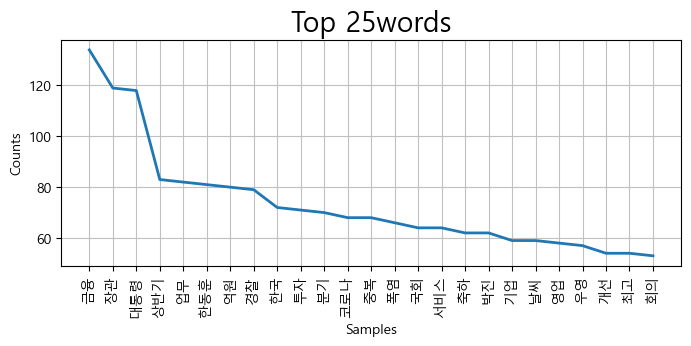

<AxesSubplot:title={'center':'Top 25words'}, xlabel='Samples', ylabel='Counts'>

In [342]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

corpus = nltk.Text(noun_list)

# 그래프로 시각화
plt.figure(figsize=(8, 3), dpi=100)
plt.title('Top 25words', fontsize=20)
corpus.plot(25)

<AxesSubplot:xlabel='index', ylabel='cnt'>

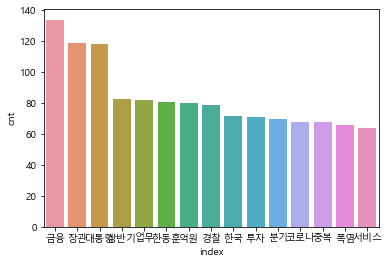

In [343]:
sns.barplot(x='index', y='cnt', data=df10, orient='v')

(-0.5, 4999.5, 1999.5, -0.5)

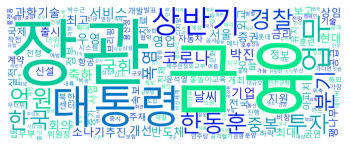

In [344]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='winter', width=5000 ,height=2000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

In [214]:
import requests as rq
from bs4 import BeautifulSoup as bsp
import pandas as pd

#### 0726_3
```
제품 테이블에서 첫번째 타이틀 행을 제외한 모든 제품 행을 출력하세요
html = urlopen('http://www.pythonscraping.com/pages/page3.html',context=context)
```

In [367]:
from bs4 import BeautifulSoup as bsp
import urllib.request as req

html = req.urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = bsp(html, 'lxml')
soup = bs.find_all('tr', class_='gift')
li=[]
for i in soup:
    li.append(i.text)
li = ' '.join(li)
li = re.sub('[\']+','', li)
li = re.sub('[\n]+','\n', li)
print(li)




Vegetable Basket
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!
$15.00
 
Russian Nesting Dolls
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!
$10,000.52
 
Fish Painting
If something seems fishy about this painting, its because its a fish! Also hand-painted by trained monkeys!
$10,005.00
 
Dead Parrot
This is an ex-parrot! Or maybe hes only resting?
$0.50
 
Mystery Box
If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!
$1.50



# Q 카테고리별로 / 전체로 / 불용어, 결측치, 중복 빼고


In [6]:
html="""
<head>
    <title>crawler</title>
</head>
<body>
    <p class="a" align="center"> text1</p>
    <p class="b" align="center"> text2</p>
    <p class="c" align="center"> text3</p>
    <div>
        <img src="/source" width="300" height="200">
    </div>
</body>
</html>
"""


In [8]:
from bs4 import BeautifulSoup as bsp

bs = bsp(html, 'html.parser')
contents = bs.find('body')
for child in contents.children:  # children  bs4의 함수 자손
    print(child)



<p align="center" class="a"> text1</p>


<p align="center" class="b"> text2</p>


<p align="center" class="c"> text3</p>


<div>
<img height="200" src="/source" width="300"/>
</div>




In [10]:
# body의 사존은 p, div, img
for d in contents.descendants: # 후손
    print(d)



<p align="center" class="a"> text1</p>
 text1


<p align="center" class="b"> text2</p>
 text2


<p align="center" class="c"> text3</p>
 text3


<div>
<img height="200" src="/source" width="300"/>
</div>


<img height="200" src="/source" width="300"/>






In [13]:
img_tag = contents.find('img')
img_tag

<img height="200" src="/source" width="300"/>

In [12]:
print(list(img_tag.parents)) # 부모

[<div>
<img height="200" src="/source" width="300"/>
</div>, <body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>, 
<head>
<title>crawler</title>
</head>
<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

]


In [14]:
contents

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

In [15]:
# 부모객체
contents.div.img

<img height="200" src="/source" width="300"/>

In [16]:
p_tag = bs.find('p', class_='b')
p_tag

<p align="center" class="b"> text2</p>

In [21]:
# find_previous_sibling() : 바로 이전 형제 노드를 검색
# find_previous_siblings() : 이전의 모든 형제 노드를 검색

p_tag = bs.find('p', class_='c')
print(p_tag.find_previous_sibling())
print(p_tag.find_previous_siblings())

<p align="center" class="b"> text2</p>
[<p align="center" class="b"> text2</p>, <p align="center" class="a"> text1</p>]


In [25]:
import urllib
from bs4 import BeautifulSoup as bsp

response = urllib.request.urlopen('https://naver.com')
byte_data = response.read()
html = byte_data.decode('utf-8')
bs = bsp(html, 'html.parser')
print(bs.find_all('a',{'class':'link_newsstand'}))

[<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>]


In [27]:
nlists = bs.find_all('a',{'class':{'link_newsstand', 'btn_sort', 'btn_sort.sort_on'}})
for n in nlists:
    print(n.get_text())

뉴스스탠드
구독한 언론사
전체언론사


In [29]:
hlists = bs.findAll({'h1','h2','h3','h4','h5','h6'}, limit=5)
for h in hlists:
    print(h, '\n')

<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1> 

<h2 class="blind">뉴스스탠드</h2> 

<h2 class="blind">주제별 캐스트</h2> 

<h2 class="blind">Sign in</h2> 

<h2 class="blind">타임스퀘어</h2> 



In [30]:
hlists = bs.findAll({'h1','h2','h3','h4','h5','h6'}, limit=5)
for h in hlists:
    print(h.get_text(), '\n')


네이버
 

뉴스스탠드 

주제별 캐스트 

Sign in 

타임스퀘어 



#### 0727_1 과제

In [1]:
# Q. 코스피 지수, 등락폭 및 등락율을 출력하세요.
import requests as rq
from bs4 import BeautifulSoup as bsp

# 네이버 금융 국내증시 메인 사이트 주소
# url = "https://finance.naver.com/sise/"
url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'


In [2]:
url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'
res = rq.get(url)
res = res.text
bs = bsp(res, 'lxml')
val = bs.select_one('#quotient')
print(val.text)


2,415.53
0.00 -0.00%상승



In [37]:
from bs4 import BeautifulSoup as bsp

fp = open('books.html', encoding='utf-8')
bs = bsp(fp, 'html.parser')
print(bs, '\n')
sel = lambda q:print(bs.select_one(q).string)
sel('#nu')

<ul id="bible">
<li id="ge">Genesis</li>
<li id="ex">Exodus</li>
<li id="le">Leviticus</li>
<li id="nu">Numbers</li>
<li id="de">Deuteronomy</li>
</ul> 

Numbers


In [42]:
# 9개의 Numbers를 출력하세요
sel('#nu')
sel('li#nu')
sel('#bible > #nu')
sel('#bible #nu')
sel('ul li#nu')
sel('ul #nu')
sel('ul > #nu')
sel('li:nth-child(4)')
sel('ul li:nth-child(4)')

Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


#### 0727_2 과제
```
네이버 뉴스 검색 사이트에서 검색 키워드와 총 필요한 뉴스기사 수를 입력하면 요청한 만큼 데이터프레임 형태(title, url)로 출력해주는 크롤링 프로그램을 수행하세요.
url = https://search.naver.com/search.naver?where=news&sm=tab_jum&query=
```

In [5]:
import requests as rq
from bs4 import BeautifulSoup as bsp
import urllib

keyword = input("키워드 입력:")
q = int(input("몇개의 기사를 출력할까요?:"))
keyword = urllib.parse.quote(keyword)

a = divmod(q,10)
b=a[0]*10+1
c=a[1]

import pandas as pd
df = pd.DataFrame(columns=['title','url'])

while i < q:
    i=0
    
    url = f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={keyword}sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=35&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={pageno}'
    res = rq.get(url)
    text=res.text
    bs = bsp(text, 'lxml')
    soup = bs.find_all('a', class_='news_tit', limit=c)
    
    for s in soup:
    url = s.attrs['href']
    title = s.get_text()
    df.loc[i]=[title,url] # df의 ind 행에 리스트 삽입
    i += 1
    
    if i == q:
        break




        
df

키워드 입력:한동훈
몇개의 기사를 출력할까요?:5


,title,url
0,"한동훈, 文정부 정면 반박 ""탈북어민 처벌 가능…전례 있다""",https://www.joongang.co.kr/article/25090109
1,"'한동훈 폭행' 정진웅 무죄, 검찰 불복…대법 상고",http://www.inews24.com/view/1504855
2,"尹, 한동훈에 ""부정부패 엄정대응…기업위축 과도한 형벌 개선""",https://www.yna.co.kr/view/AKR2022072607960000...
3,"박범계 ""왕중왕 장관 아닌가""…한동훈 ""전혀 그렇지 않다""",https://www.hankyung.com/politics/article/2022...
4,박범계 “법무부 인사검증 법치농단” 한동훈 “그러면 文민정실도 위법”,https://www.chosun.com/politics/politics_gener...


박세희씨 과제 찢어놓은거 

In [ ]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

In [5]:
a = divmod(10,2)

In [7]:
a[0]

5